<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [13]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy


## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [14]:
import bs4
from bs4 import BeautifulSoup
import requests



In [31]:
df = pd.read_csv('./data/job_listings.csv', index_col=0)
df.head(10)

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist
5,b'<div>Create various Business Intelligence An...,Data Scientist
6,b'<div><p>As Spotify Premium swells to over 96...,Associate Data Scientist – Premium Analytics
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist
8,"b""<ul><li>MS in a quantitative discipline such...",Sr. Data Scientist
9,b'<div><p>Slack is hiring experienced data sci...,"Data Scientist, Lifecyle"


In [32]:
df['description'] = df['description'].apply(lambda x: BeautifulSoup(x).get_text().replace("\\n", " " ).strip("b'").lower())

In [33]:
df.head()

,description,title
0,"""job requirements: conceptual understanding in...",Data scientist
1,"job description as a data scientist 1, you wi...",Data Scientist I
2,as a data scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist
4,location: usa \xe2\x80\x93 multiple locations ...,Data Scientist


In [41]:
## 2) Use Spacy to tokenize the listings 

In [34]:
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

In [35]:
def tokenize(text):
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [36]:
df['tokens'] = df['description'].apply(tokenize)

In [37]:
df.head()

,description,title,tokens
0,"""job requirements: conceptual understanding in...",Data scientist,"[job, requirements, conceptual, understanding,..."
1,"job description as a data scientist 1, you wi...",Data Scientist I,"[job, description, as, a, data, scientist, 1, ..."
2,as a data scientist you will be working on con...,Data Scientist - Entry Level,"[as, a, data, scientist, you, will, be, workin..."
3,"$4,969 - $6,756 a monthcontractunder the gener...",Data Scientist,"[4969, 6756, a, monthcontractunder, the, gener..."
4,location: usa \xe2\x80\x93 multiple locations ...,Data Scientist,"[location, usa, xe2x80x93, multiple, locations..."


In [38]:
# Transform a word into base form by lemmatization

def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    
    for token in doc:
        if((token.is_stop ==False) and (token.is_punct ==False)) and (token.pos_!='PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [99]:
df['lemmas'] = df['description'].apply(get_lemmas)

In [100]:
df['lemmas'].head(10)

0    [job, requirement, conceptual, understanding, ...
1    [job, description,  , data, scientist, 1, help...
2    [data, scientist, work, consult, business, res...
3    [$, 4,969, $, 6,756, monthcontractunder, gener...
4    [location, usa, \xe2\x80\x93, multiple, locati...
5    [create, business, intelligence, analytical, r...
6    [spotify, premium, swell, 96, m, subscriber, g...
7    [everytown, gun, safety, nation, large, gun, v...
8    [ms, quantitative, discipline, statistic, math...
9    [slack, hire, experienced, datum, scientist, j...
Name: lemmas, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [69]:
# Analyzing tokens
from collections import Counter
word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))
# Print out the 10 most common words
word_counts.most_common(10)


[('and', 11575),
 ('to', 6844),
 ('the', 5515),
 ('of', 4567),
 ('data', 4260),
 ('a', 3581),
 ('in', 3567),
 ('with', 3075),
 ('for', 2069),
 ('experience', 1818)]

In [70]:
# Analyzing with lemmas
from collections import Counter
word_counts = Counter()
df['lemmas'].apply(lambda x: word_counts.update(x))
# Print out the 10 most common words
word_counts.most_common(10)

[('datum', 3398),
 (' ', 2225),
 ('experience', 1935),
 ('work', 1646),
 ('team', 1352),
 ('business', 1263),
 ('data', 1047),
 ('science', 988),
 ('product', 893),
 ('analytic', 836)]

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
text = df['description']
vect = CountVectorizer()
vect.fit(text)
dtm = vect.transform(text)


In [73]:
print(vect.get_feature_names())

['00', '000', '02115', '03', '0305', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '1026036', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million

In [74]:
text[:25]

0     "job requirements: conceptual understanding in...
1     job description  as a data scientist 1, you wi...
2     as a data scientist you will be working on con...
3     $4,969 - $6,756 a monthcontractunder the gener...
4     location: usa \xe2\x80\x93 multiple locations ...
5     create various business intelligence analytica...
6     as spotify premium swells to over 96m subscrib...
7     "everytown for gun safety, the nation's larges...
8     "ms in a quantitative discipline such as stati...
9     slack is hiring experienced data scientists to...
10    who we are blackthorn therapeutics is a comput...
11    part-timeabout the opportunity here at grubhub...
12    "nfosys\xe2\x80\x93 data & analytics \xe2\x80\...
13    as spotify premium swells to over 96m subscrib...
14    experience with guiding r&d strategy for your ...
15    the atlantic is seeking a data scientist to he...
16    the challenge eventbrite is big, bustling mark...
17    contractwe are looking to hire for a data 

In [75]:
print(dtm)

  (0, 230)	2
  (0, 509)	1
  (0, 580)	2
  (0, 620)	2
  (0, 648)	1
  (0, 674)	1
  (0, 688)	1
  (0, 710)	1
  (0, 769)	1
  (0, 932)	1
  (0, 1090)	1
  (0, 1493)	1
  (0, 1551)	1
  (0, 1635)	1
  (0, 1713)	1
  (0, 1724)	1
  (0, 2101)	1
  (0, 2162)	1
  (0, 2197)	1
  (0, 2522)	1
  (0, 2659)	1
  (0, 2893)	1
  (0, 3007)	2
  (0, 3024)	1
  (0, 3055)	1
  :	:
  (425, 8375)	1
  (425, 8396)	1
  (425, 8445)	1
  (425, 8469)	2
  (425, 8506)	1
  (425, 8512)	1
  (425, 8514)	1
  (425, 8520)	2
  (425, 8533)	3
  (425, 8535)	2
  (425, 8549)	10
  (425, 8551)	2
  (425, 8552)	1
  (425, 8562)	7
  (425, 8568)	1
  (425, 8571)	2
  (425, 8574)	1
  (425, 8598)	5
  (425, 8611)	2
  (425, 8647)	3
  (425, 8715)	5
  (425, 8728)	2
  (425, 8734)	1
  (425, 8739)	3
  (425, 8741)	1


In [76]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
len(df)

426

In [79]:
doc_len = [len(doc) for doc in df]

C:\Users\ivana\Anaconda3\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


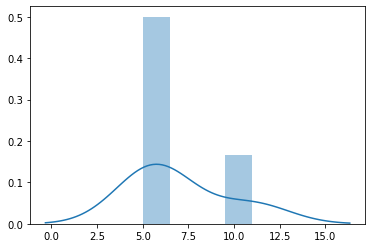

In [80]:
import seaborn as sns

sns.distplot(doc_len);

## 4) Visualize the most common word counts

In [82]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
wc = count(df['lemmas'])

In [83]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,datum,415,3398,1.0,0.024792,0.024792,0.974178
265,,361,2225,2.0,0.016234,0.041026,0.847418
29,experience,409,1935,3.0,0.014118,0.055144,0.960094
34,work,383,1646,4.0,0.012009,0.067153,0.899061
154,team,369,1352,5.0,0.009864,0.077017,0.866197


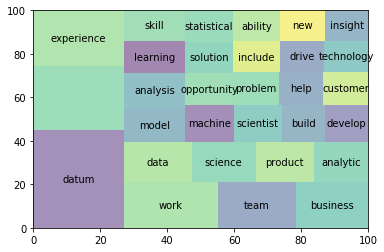

In [85]:
import squarify
squarify.plot(sizes=wc.iloc[:30]['pct_total'], label=wc['word'],alpha=.5);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106253,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [98]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

ValueError: Expected 2D array, got scalar array instead:
array=Ellipsis.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [97]:
nn.kneighbors(dtm)

NotFittedError: This NearestNeighbors instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 